# **Базовая нейросеть**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        13
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



G:\! My files\cources\практика\4laba\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=100)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.62      0.76        13
           2       0.67      1.00      0.80        10

    accuracy                           0.83        30
   macro avg       0.89      0.87      0.85        30
weighted avg       0.89      0.83      0.83        30



G:\! My files\cources\практика\4laba\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Самостоятельное задание. Для выполнения выбран Gaussian process classification (GPC) on iris dataset из Gaussian Process for Machine Learning. Ниже пример его реализации со scikit-learn**

Сначала пробуем код из официального примера библиотеки для понимания функциональности и структуры предложенного метода.

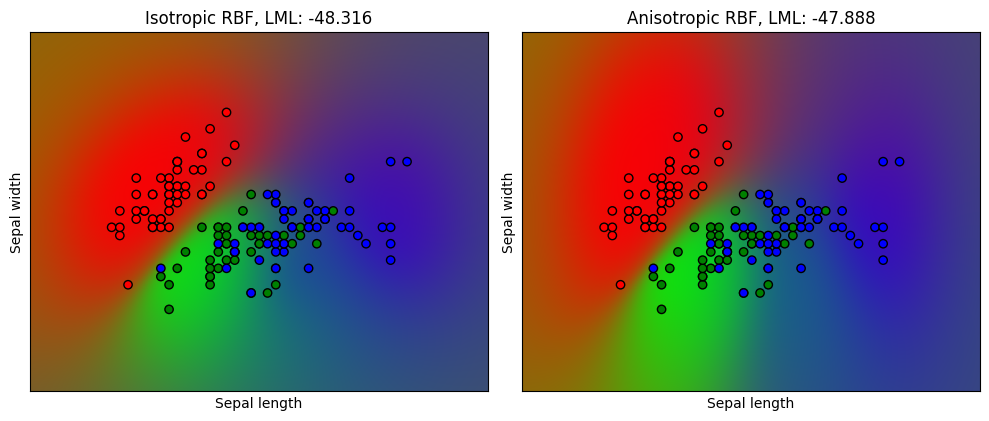

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = 0.02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

plt.tight_layout()
plt.show()

**Теперь с этим алгоритмом используем синтетический датасет "make_classification" из generated datasets.**

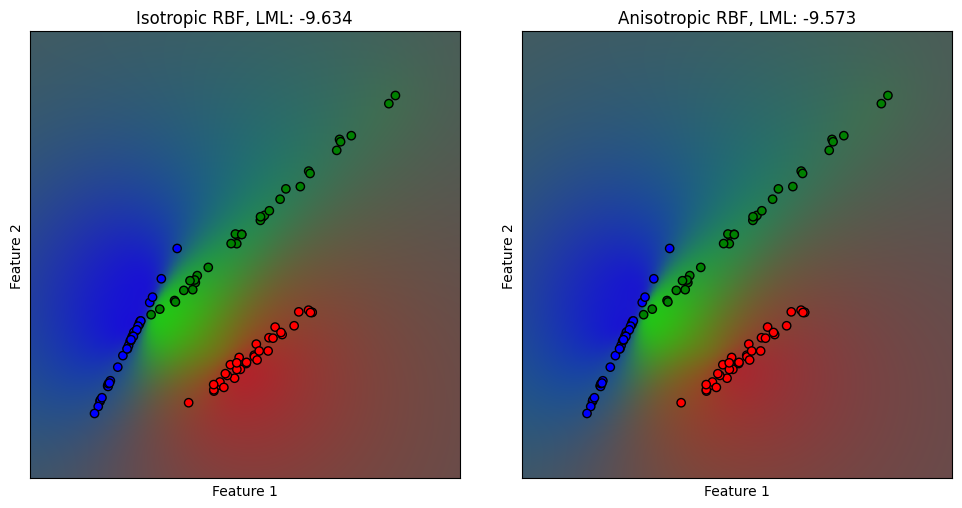

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Создание сгенерированного набора данных
X, y = datasets.make_classification(
    n_samples=100, 
    n_features=2, 
    n_classes=3,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    random_state=42
)

h = 0.02

kernel_isotropic = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel_isotropic).fit(X, y)

kernel_anisotropic = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel_anisotropic).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))

for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

plt.tight_layout()
plt.show()

**Распишем подробнее**

*Цель работы* - продемонстрировать работу метода Gaussian process classification (GPC) on iris dataset. Метод реализован на основе цикла for.

*Использовать* - метод Gaussian process classification (GPC) on iris dataset из раздела Gaussian Process for Machine Learning.

*Протестировать* - на двух базах данных: синтетический датасет make_classification и реальный датасет: "Credit-Card-Dataset-for-Clustering" (с openml.org)

*Проверить и визуализировать* - результаты кластеризации и предсказания обученного классификатора на этих же данных.


Импорт библиотек:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

Генерация данных:
X, y = datasets.make_classification(
    n_samples=100, 
    n_features=2, 
    n_classes=3,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    random_state=42
)

Визуализация данных:
plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Изначальный датасет make_classification (3 класса)")
plt.show()

Обучение и построение модели:
kernel_isotropic = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel_isotropic).fit(X, y)
kernel_anisotropic = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel_anisotropic).fit(X, y)

Предсказание для новых данных:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

*Результаты:*
Модель Gaussian Process Classifier (GPC) использует гауссов процесс для прогнозирования вероятности принадлежности к одному из классов. С помощью ядер, таких как RBF (радиально-базисное ядро), она оценивает, как признаки связаны с классами и использует эту информацию для предсказания.

Плюсы метода Gaussian Process Classification:
- Гибкость и точность — благодаря использованию ядра GPC может моделировать сложные зависимости между признаками.
- Невероятная способность к обобщению — модель хорошо работает на новых данных, даже если их характеристики сильно отличаются от обучающего набора.
- Предоставление вероятностей — позволяет не только классифицировать данные, но и оценивать степень уверенности в предсказаниях.

Вывод: Метод Gaussian Process Classification является мощным инструментом для задач классификации, особенно когда необходимо учитывать не только сами данные, но и структуру вероятностей. Это может быть полезно в таких областях, как диагностика, финансы или любой другой анализ, где важна степень уверенности в принятом решении.

# **Теперь делаю на реальном датасете iris с OpenML:** https://www.openml.org/search?type=data&sort=runs&status=active&id=61

Доступные признаки: ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']


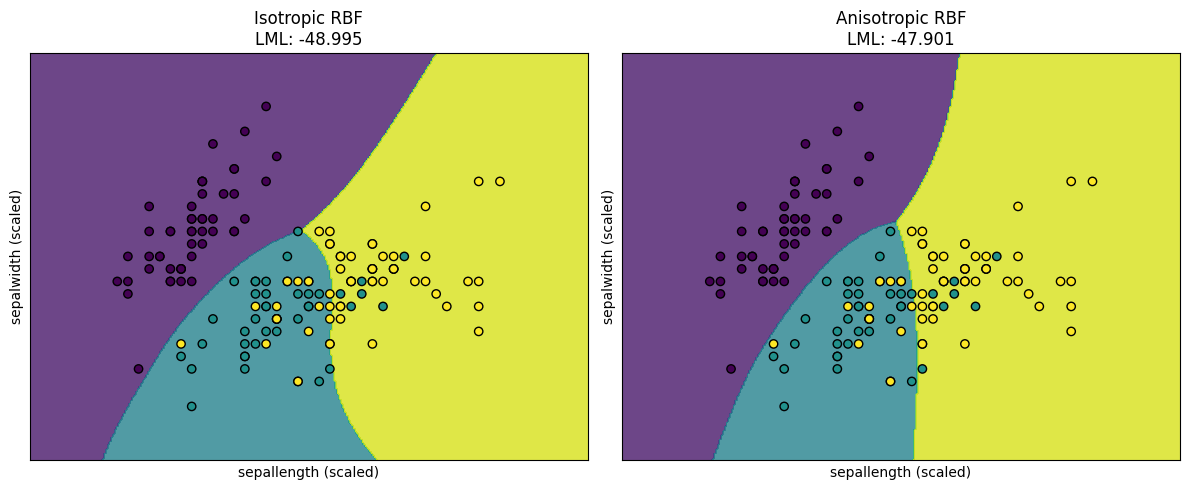

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Загрузка набора данных с OpenML
dataset = fetch_openml(data_id=61, as_frame=True)
df = dataset.frame

# Проверка наличия необходимых признаков
print("Доступные признаки:", df.columns.tolist())

# Выбор двух признаков для визуализации
feature_names = df.columns[:2]  # Используем первые два признака
X = df[feature_names].values
y = df[dataset.target.name].values

# Преобразование меток классов в числовой формат
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Определение границ для визуализации
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Определение ядер
kernel_isotropic = 1.0 * RBF(length_scale=1.0)
kernel_anisotropic = 1.0 * RBF(length_scale=[1.0, 1.0])

# Обучение моделей
gpc_iso = GaussianProcessClassifier(kernel=kernel_isotropic, random_state=0)
gpc_aniso = GaussianProcessClassifier(kernel=kernel_anisotropic, random_state=0)

gpc_iso.fit(X_scaled, y_encoded)
gpc_aniso.fit(X_scaled, y_encoded)

# Визуализация
titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(12, 5))

for i, clf in enumerate((gpc_iso, gpc_aniso)):
    plt.subplot(1, 2, i + 1)
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z_max = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z_max, alpha=0.8, cmap=plt.cm.viridis)

    # Отображение обучающей выборки
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, edgecolors="k", cmap=plt.cm.viridis)
    plt.xlabel(f"{feature_names[0]} (scaled)")
    plt.ylabel(f"{feature_names[1]} (scaled)")
    plt.title(f"{titles[i]}\nLML: {clf.log_marginal_likelihood(clf.kernel_.theta):.3f}")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()


*Описание набора данных*
Датасет "Iris" содержит информацию о 150 экземплярах цветков ириса, разделенных на три вида (Iris setosa, Iris versicolor, Iris virginica). Для каждого экземпляра представлены четыре морфологических признака: длина и ширина чашелистика (sepal), длина и ширина лепестка (petal).

Импорт библиотек:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

Получение данных:
dataset = fetch_openml(data_id=61, as_frame=True)
df = dataset.frame

Предобработка данных:
feature_names = df.columns[:2]
X = df[feature_names].values
y = df[dataset.target.name].values
le = LabelEncoder()
y_encoded = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Обучение модели:
kernel_isotropic = 1.0 * RBF(length_scale=1.0)
kernel_anisotropic = 1.0 * RBF(length_scale=[1.0, 1.0])
gpc_iso = GaussianProcessClassifier(kernel=kernel_isotropic, random_state=0)
gpc_aniso = GaussianProcessClassifier(kernel=kernel_anisotropic, random_state=0)
gpc_iso.fit(X_scaled, y_encoded)
gpc_aniso.fit(X_scaled, y_encoded)

Визуализация границ решений:
h = 0.02  # Шаг сетки
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.figure(figsize=(12, 5))
for i, clf in enumerate((gpc_iso, gpc_aniso)):
    plt.subplot(1, 2, i + 1)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z_max = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z_max, alpha=0.8, cmap=plt.cm.viridis)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, edgecolors="k", cmap=plt.cm.viridis)
    plt.title(f"{titles[i]}\nLML: {clf.log_marginal_likelihood(clf.kernel_.theta):.3f}")
plt.show()

*Интерпретация результатов*
Наблюдаемые эффекты:
- Изотропное ядро создает симметричные границы решений, что может быть менее гибким при разделении сложных классов.
- Анизотропное ядро позволяет учитывать разную вариативность признаков, улучшая соответствие данным (видно по значению логарифмической маргинальной вероятности, LML).

Практическая значимость:
- Метод подходит для задач классификации с малым объемом данных.
- Визуализация границ решений помогает оценить, насколько хорошо модель обобщает закономерности.

Рекомендации:
- Для многомерных данных стоит использовать все признаки, а не только два.
- Эксперименты с другими ядрами (например, Matérn) могут улучшить качество модели.